In [75]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets, linear_model, preprocessing
%matplotlib inline
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import json

In [76]:
df = pd.read_csv("train_final.csv")
df.shape

(2996, 14)

In [77]:
budgetval = df["budget"].values

for i in range(len(budgetval)):
  if budgetval[i] == 0:
    budgetval[i] = np.random.randint(5000000, 18000000)

In [78]:
df.head()

,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,release_date,runtime,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",10/10/14,105,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,3/9/12,122,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,5429921,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,2/5/09,118,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [79]:
df['2xbudget'] = (df['budget'].values*2)

In [80]:
df['label'] = df['budget']

txbval = df['2xbudget'].values
revval = df['revenue'].values
labelval = df['label'].values

count_succ = 0
count_fail = 0
for i in range(len(txbval)):
  if(txbval[i] < revval[i]):
    labelval[i] = 1
    count_fail += 1
  else:
    labelval[i] = 0
    count_succ += 1
print("succ: ", count_succ, "fail: ", count_fail)
1769/2996

succ:  1768 fail:  1228


0.5904539385847797

In [81]:
df['log_revenue'] = np.log1p(df['revenue'])
df['log_2xbudget'] = np.log1p(df['2xbudget'])

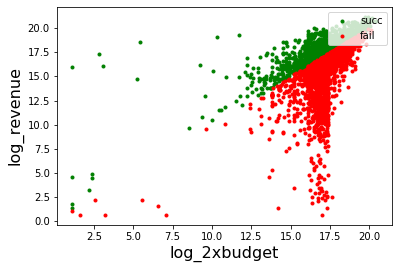

In [82]:
fail = (labelval==0)
succ = (labelval==1)

# Get two predictors
xnames =['log_2xbudget','log_revenue'] 
X = df[xnames].values

# Create the scatter plot
plt.plot(X[succ,0],X[succ,1],'g.')
plt.plot(X[fail,0],X[fail,1],'r.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
#plt.ylim(0,14)
plt.legend(['succ','fail'],loc='upper right')

# Data Analysis

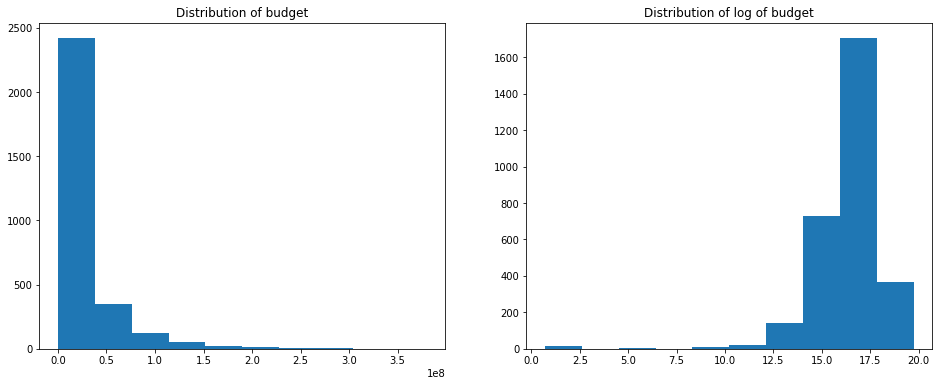

In [83]:
fig, ax = plt.subplots(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.hist(df['budget']);
plt.title('Distribution of budget');
plt.subplot(1, 2, 2)
plt.hist(np.log1p(df['budget']));
plt.title('Distribution of log of budget');

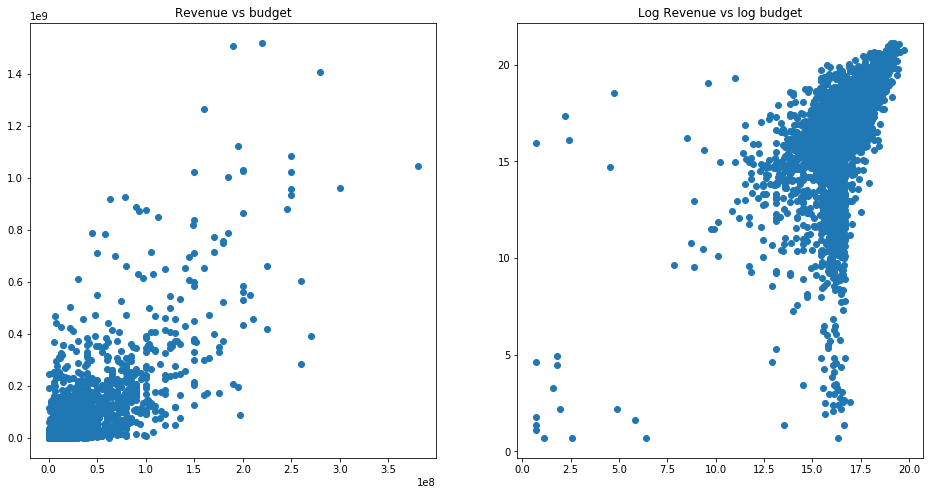

In [84]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['budget'], df['revenue'])
plt.title('Revenue vs budget');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(df['budget']), df['log_revenue'])
plt.title('Log Revenue vs log budget');

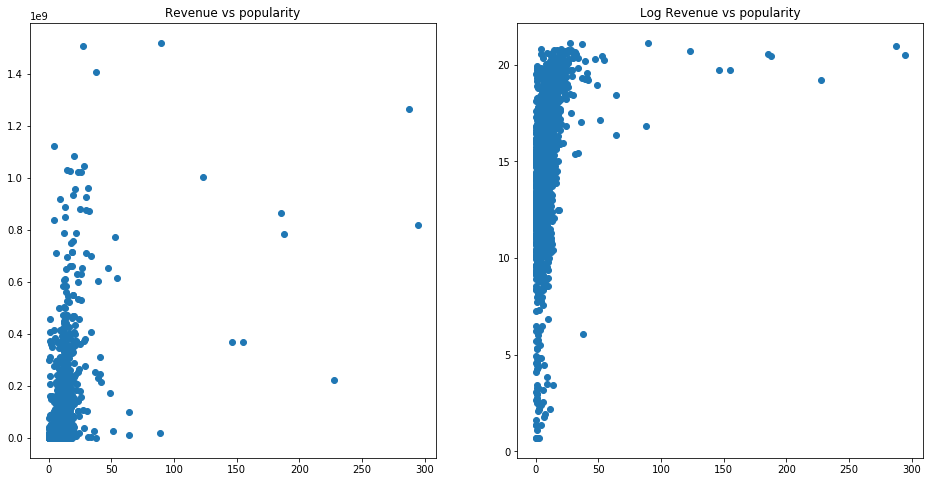

In [85]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(df['popularity'], df['revenue'])
plt.title('Revenue vs popularity');
plt.subplot(1, 2, 2)
plt.scatter(df['popularity'], df['log_revenue'])
plt.title('Log Revenue vs popularity');

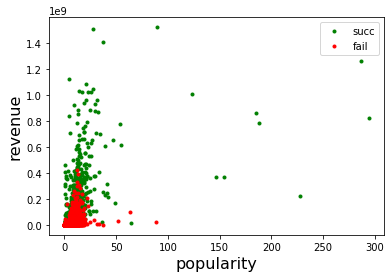

In [86]:
# Get two predictors

xnames =['popularity','revenue'] 
X = df[xnames].values

# Create the scatter plot
plt.plot(X[succ,0],X[succ,1],'g.')
plt.plot(X[fail,0],X[fail,1],'r.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
#plt.ylim(0,14)
plt.legend(['succ','fail'],loc='upper right')

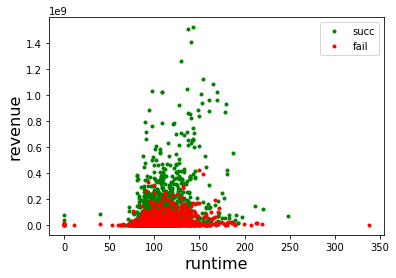

In [87]:
# Get two predictors

xnames =['runtime','revenue'] 
X = df[xnames].values

# Create the scatter plot
plt.plot(X[succ,0],X[succ,1],'g.')
plt.plot(X[fail,0],X[fail,1],'r.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
#plt.ylim(0,14)
plt.legend(['succ','fail'],loc='upper right')

In [88]:
belongval = df["belongs_to_collection"].values
for i in range(len(belongval)):
  if pd.isna(belongval[i]):
    belongval[i] = 0
  else:
    belongval[i] = 1

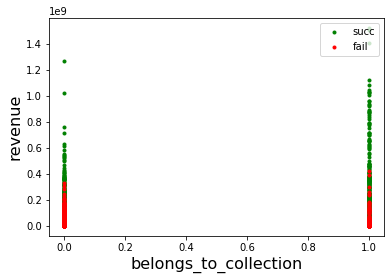

In [89]:
# Get two predictors

xnames =['belongs_to_collection','revenue'] 
X = df[xnames].values

# Create the scatter plot
plt.plot(X[succ,0],X[succ,1],'g.')
plt.plot(X[fail,0],X[fail,1],'r.')
plt.xlabel(xnames[0], fontsize=16)
plt.ylabel(xnames[1], fontsize=16)
#plt.ylim(0,14)
plt.legend(['succ','fail'],loc='upper right')

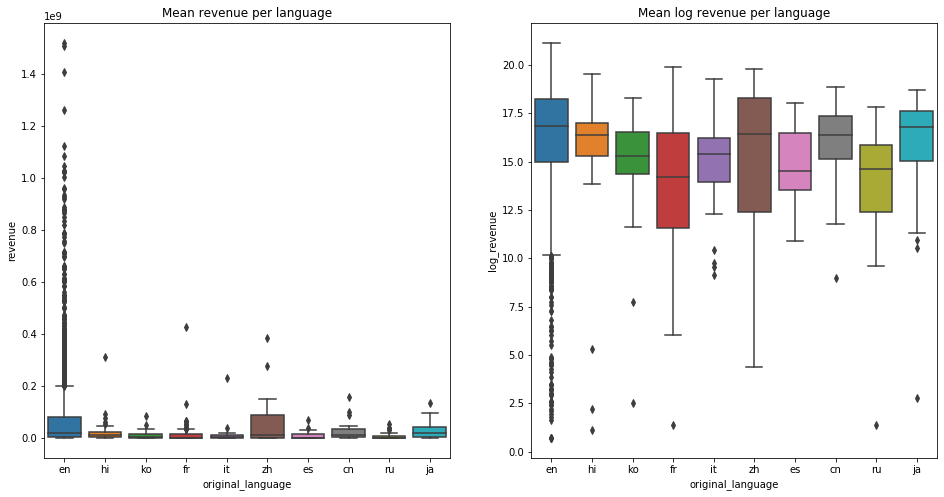

In [90]:
import seaborn as sns
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
sns.boxplot(x='original_language', y='revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean revenue per language');
plt.subplot(1, 2, 2)
sns.boxplot(x='original_language', y='log_revenue', data=df.loc[df['original_language'].isin(df['original_language'].value_counts().head(10).index)]);
plt.title('Mean log revenue per language');

# Feature Transformation

In [91]:
genreval = df["genres"]
a = genreval[1]
print(genreval)

0                          [{'id': 35, 'name': 'Comedy'}]
1       [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                           [{'id': 18, 'name': 'Drama'}]
3       [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4       [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
                              ...                        
2991    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2992    [{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...
2993    [{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...
2994    [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...
2995    [{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...
Name: genres, Length: 2996, dtype: object


In [92]:
genremtx = df["genres"]

d={}
for item in genremtx:
    if (pd.notna(item) and len(item)>1):
        item = item.replace("\'", '\"')
        item_parsed = json.loads(item)
        for key in item_parsed:
            #print(key["name"], type(key))
            if key["name"] in d:
                d[key["name"]] += 1
            else:
                d[key["name"]] = 1
total = 0
for item in d:
    total += d.get(item)
for item in d:
    d[item] = d.get(item) / total
#print(d)

df["genre_t"] = genremtx
for i in range(len(df["genre_t"])):
    if (pd.notna(df["genre_t"][i]) and len(df["genre_t"][i])>1):
        item = df["genre_t"][i].replace("\'", '\"')
        item_parsed = json.loads(item)
        #print(type(item_parsed))
        total = 0
        count = 0
        for key in item_parsed:
            val = key.get("name")
            total += d.get(val)
            count += 1
        
        df["genre_t"][i] = np.around((total/count) * 100, decimals=1)
    else:
        df["genre_t"][i] = 0


/Users/sallykim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/sallykim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [93]:
df["release_t"] =  df["release_date"]

for i in range(len(df["release_t"])):
    new = df["release_t"][i].split("/")
    if int(new[0]) >= 3 and int(new[0]) <= 5:
        df["release_t"][i] = 0
    elif int(new[0]) < 9 and int(new[0]) > 5:
        df["release_t"][i] = 1
    elif int(new[0]) < 11 and int(new[0]) > 9:
        df["release_t"][i] = 2
    else:
        df["release_t"][i] = 3
print(df["release_t"])
df.head()


/Users/sallykim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':
/Users/sallykim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/sallykim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we lo

0       3
1       1
2       2
3       0
4       3
       ..
2991    0
2992    0
2993    2
2994    3
2995    3
Name: release_t, Length: 2996, dtype: object


,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,release_date,runtime,title,Keywords,cast,crew,revenue,2xbudget,label,log_revenue,log_2xbudget,genre_t,release_t
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,28000000,0,16.326300,17.147715,13.7,3
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,80000000,1,18.370959,18.197537,11.3,1
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",10/10/14,105,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,6600000,1,16.387512,15.702580,20.4,2
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,3/9/12,122,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2400000,1,16.588099,14.690980,15.4,0
4,5,0,5429921,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,2/5/09,118,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,10859842,0,15.182615,16.200582,10.2,3


In [94]:
import requests
import codecs
import json
from codecs import raw_unicode_escape_decode

df["production_comp_t"] = df["production_companies"]
for i in range(len(df["production_comp_t"])):
    count = 0
    if type(df["production_comp_t"][i]) != float:
        item= df["production_comp_t"][i].replace(" \'", ' \"')
        item= item.replace("{\'", '{\"')
        item= item.replace("\':", '\":')
        item= item.replace("\',", '\",')
        if ("'\'") not in item:
            item_parsed = json.loads(item)
            for key in item_parsed:
                 count+=1;
    df["production_comp_t"][i] = count

df.head()

#problem is that some companies have \ char in them, causing error in json

/Users/sallykim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,id,belongs_to_collection,budget,genres,original_language,popularity,production_companies,release_date,runtime,title,...,cast,crew,revenue,2xbudget,label,log_revenue,log_2xbudget,genre_t,release_t,production_comp_t
0,1,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...",2/20/15,93,Hot Tub Time Machine 2,...,"[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,28000000,0,16.326300,17.147715,13.7,3,3
1,2,1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,"[{'name': 'Walt Disney Pictures', 'id': 2}]",8/6/04,113,The Princess Diaries 2: Royal Engagement,...,"[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,80000000,1,18.370959,18.197537,11.3,1,1
2,3,0,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...",10/10/14,105,Whiplash,...,"[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,6600000,1,16.387512,15.702580,20.4,2,3
3,4,0,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,NaN,3/9/12,122,Kahaani,...,"[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,2400000,1,16.588099,14.690980,15.4,0,0
4,5,0,5429921,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,NaN,2/5/09,118,Marine Boy,...,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,10859842,0,15.182615,16.200582,10.2,3,0


# Logistic Regression with train-test split

In [95]:
y = df.label
X = df.drop('label', axis=1)

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [97]:
feature_lst = ['belongs_to_collection','genre_t','popularity','release_t','production_comp_t']
row = X_train.shape[0]
Comp_val_tr = X_train[feature_lst].values
Comp_mtx_tr = np.zeros((row,len(feature_lst)))

for i in range(len(Comp_mtx_tr)):
    Comp_mtx_tr[i] = Comp_val_tr[i]
    
r = X_test.shape[0]
Comp_val_ts = X_test[feature_lst].values
Comp_mtx_ts = np.zeros((r,len(feature_lst)))

#for i in range(len(df['genre_t'])):
    #print(df['genre_t'][i])

In [98]:
logisticRegr = LogisticRegression()
logisticRegr.fit(Comp_mtx_tr, y_train)
logisticRegr.predict(Comp_mtx_ts[0].reshape(1,-1))
logisticRegr.predict(Comp_mtx_ts)
predictions = logisticRegr.predict(Comp_mtx_ts)
score = logisticRegr.score(Comp_mtx_ts, y_test)
print("Accuracy: ", score)

Accuracy:  0.5816666666666667


In [99]:
yhat = y_train
yhatl= (yhat >=0).astype(int)

In [100]:
recall = np.sum((yhatl == 1)*(y == 1))/np.sum(y == 1)
precision = np.sum((yhatl == 1)*(y == 1))/np.sum(yhatl == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Recall: 0.7956026058631922
Precision: 0.40776293823038395


# Feature Transformation on Cast

In [101]:
df["cast_temp"] = df["cast"]
#how many times the cast member appears in all movies?->value 
#add up the values of the movie ->


cast_d={}

counter = 0
for item in df["cast_temp"]:
    
    if (pd.notna(item) and len(item)>1):
        item = item.replace(" \'", ' \"')
        item= item.replace("{\'", '{\"')
        item= item.replace("\':", '\":')
        item= item.replace("\',", '\",')
        item= item.replace("\'}", '\"}')
        counter +=1
        if (counter < 1008):
            #print(item)
            item_parsed = json.loads(item)
            for key in item_parsed:
                #print(key["name"], type(key))
                if key["id"] in cast_d:
                    cast_d[key["id"]] += 1
                else:
                    cast_d[key["id"]] = 1
#print(df["cast_t"])
#goes up to 1007 values
#print(cast_d)
counter = 0
for i in range(0,len(df["cast_temp"]), 1):
    counter +=1
    total = 0
    if ((pd.notna(df["cast_temp"][i])) and (len(df["cast_temp"][i])>1) and (counter < 1008)):
        item = (df["cast_temp"][i]).replace(" \'", ' \"')
        item= item.replace("{\'", '{\"')
        item= item.replace("\':", '\":')
        item= item.replace("\',", '\",')
        item= item.replace("\'}", '\"}')
        item_parsed = json.loads(item)
        for key in item_parsed:
            val = key.get("id")
            total += cast_d.get(val)
        df["cast_temp"][i] = total
cast_t = np.zeros(1007)
for i in range(1007):
    cast_t[i] = df["cast_temp"][i]
    
cast_y = np.zeros(1007)
for i in range(1007):
    cast_y[i] = df["label"][i]
cast_y


#problem here is that some items are parsed as "None" causing error in Json

/Users/sallykim/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:44: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


array([0., 1., 1., ..., 0., 0., 1.])

In [102]:
# #cell to make Df into 1000 vals

# feature_lst_short = ['belongs_to_collection','genre_t','popularity','release_t','production_comp_t']
# feature_mtx = df[feature_lst_short].values
# mtx_1000 = np.zeros((1007, len(feature_lst_short)))
# for i in range(len(mtx_1000)):
#         mtx_1000[i] = feature_mtx[i]
# print(mtx_1000[0])
# np.column_stack((mtx_1000, cast_t))
# print(mtx_1000[0])



In [103]:
X_cast_train, X_cast_test, y_cast_train, y_cast_test = train_test_split(cast_t, cast_y,test_size=0.2, random_state=42)

In [104]:
feature_lst = ['cast_t']
row = X_cast_train.shape[0]
Cast_val_tr = X_cast_train
Cast_mtx_tr = np.zeros((row,len(feature_lst)))

for i in range(len(Cast_mtx_tr)):
    Cast_mtx_tr[i] = cast_t[i]
    
r = X_cast_test.shape[0]
Cast_val_ts = X_cast_test
Cast_mtx_ts = np.zeros((r,len(feature_lst)))

for i in range(len(Cast_mtx_tr)):
    if(not pd.notna(Cast_val_tr[i])):
        Cast_mtx_tr[i] = 0
    else:
        Cast_mtx_tr[i] = Cast_val_tr[i]
for i in range(len(Cast_mtx_ts)):
    if(not pd.notna(Cast_val_ts[i])):
        Cast_mtx_ts[i] = 0
    else:
        Cast_mtx_ts[i] = Cast_val_ts[i]
print(Cast_mtx_tr)
#for i in range(len(df['genre_t'])):
    #print(df['genre_t'][i])

[[ 39.]
 [ 78.]
 [ 16.]
 [ 17.]
 [ 34.]
 [ 50.]
 [  2.]
 [ 40.]
 [  3.]
 [ 60.]
 [ 40.]
 [ 21.]
 [  9.]
 [ 52.]
 [ 72.]
 [ 35.]
 [ 31.]
 [ 18.]
 [ 21.]
 [ 62.]
 [ 27.]
 [  9.]
 [ 19.]
 [ 10.]
 [ 16.]
 [ 75.]
 [ 15.]
 [ 10.]
 [  5.]
 [ 10.]
 [ 53.]
 [ 39.]
 [ 24.]
 [ 26.]
 [ 43.]
 [ 38.]
 [ 24.]
 [ 17.]
 [ 19.]
 [ 16.]
 [ 10.]
 [ 38.]
 [118.]
 [ 34.]
 [ 44.]
 [ 37.]
 [  4.]
 [ 25.]
 [ 54.]
 [  5.]
 [ 37.]
 [ 40.]
 [ 23.]
 [ 37.]
 [  8.]
 [ 56.]
 [ 26.]
 [ 31.]
 [ 12.]
 [ 22.]
 [ 37.]
 [  9.]
 [ 12.]
 [  4.]
 [ 37.]
 [ 16.]
 [ 40.]
 [ 80.]
 [ 45.]
 [ 24.]
 [ 30.]
 [ 27.]
 [ 48.]
 [ 58.]
 [ 17.]
 [ 57.]
 [ 29.]
 [ 10.]
 [ 35.]
 [ 44.]
 [ 19.]
 [ 56.]
 [ 33.]
 [ 29.]
 [ 20.]
 [ 33.]
 [ 43.]
 [  7.]
 [ 58.]
 [  6.]
 [ 20.]
 [ 24.]
 [ 11.]
 [ 94.]
 [ 47.]
 [ 62.]
 [ 19.]
 [ 16.]
 [  4.]
 [ 10.]
 [ 14.]
 [ 60.]
 [ 34.]
 [ 78.]
 [ 17.]
 [ 22.]
 [ 95.]
 [ 68.]
 [112.]
 [ 68.]
 [ 57.]
 [ 38.]
 [ 10.]
 [ 19.]
 [ 51.]
 [ 25.]
 [ 40.]
 [ 12.]
 [ 77.]
 [ 26.]
 [ 42.]
 [ 17.]
 [ 21.]
 [ 12.]
 [ 64.]


# LR with Cast only

In [105]:
logisticRegr = LogisticRegression()
logisticRegr.fit(Cast_mtx_tr, y_cast_train)
logisticRegr.predict(Cast_mtx_ts[0].reshape(1,-1))
logisticRegr.predict(Cast_mtx_ts)
predictions = logisticRegr.predict(Cast_mtx_ts)
score = logisticRegr.score(Cast_mtx_ts, y_cast_test)
print(score)

0.6732673267326733


# SVM Linear Kernel

In [106]:
from sklearn import datasets, svm

In [107]:
svc = svm.SVC(probability=False,  kernel="linear", C=2.8, gamma=.0073,verbose=10)

In [108]:
svc.fit(Comp_mtx_tr, y_train)

[LibSVM]

SVC(C=2.8, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.0073, kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=10)

In [109]:
predict_ts = svc.predict(Comp_mtx_ts)

In [110]:
acc = np.mean(predict_ts == y_test)
print('Accuaracy = {0:f}'.format(acc))

Accuaracy = 0.581667


# SVM Linear Kernel using cross validation

In [117]:
from sklearn.model_selection import cross_val_score
clf = svm.SVC(kernel='linear', C=1)
scores = cross_val_score(clf, Comp_mtx_tr, y_train, cv=3)
scores

array([0.66708385, 0.65957447, 0.67293233])

In [119]:
yhat_lk = y_train
yhatl_lk= (yhat >=0).astype(int)

In [120]:
recall = np.sum((yhatl_lk == 1)*(y == 1))/np.sum(y == 1)
precision = np.sum((yhatl_lk == 1)*(y == 1))/np.sum(yhatl_lk == 1)
print("Recall: " + str(recall))
print("Precision: " + str(precision))

Recall: 0.7956026058631922
Precision: 0.40776293823038395


# SVM RBF also using cross validation

In [112]:
svcrbf = svm.SVC(probability=False,  kernel="rbf", C=2.8, gamma=.0073,verbose=10)

In [113]:
#svcrbf.fit(Comp_mtx_tr,y_train)

In [114]:
#predict_rbf_ts = svcrbf.predict(Comp_mtx_ts)

acc_rbf = np.mean(predict_rbf_ts == y_test)
print('Accuaracy = {0:f}'.format(acc_rbf))

In [115]:
X_folds = np.array_split(Comp_mtx_tr, 3)
y_folds = np.array_split(y_train, 3)
scores = list()
for k in range(3):
    X_tr = list(X_folds)
    X_ts = X_tr.pop(k)
    X_tr = np.concatenate(X_tr)
    y_tr = list(y_folds)
    y_ts = y_tr.pop(k)
    y_tr = np.concatenate(y_tr)
    scores.append(svcrbf.fit(X_tr, y_tr).score(X_ts, y_ts))
print(scores)

[LibSVM][LibSVM][LibSVM][0.6795994993742178, 0.6770963704630788, 0.6879699248120301]


In [116]:
# 'belongs_to_collection','budget','genre_t','popularity','release_t','revenue','production_comp_t'